# Quality of Poliaxid

# Estimation of the result of the empirical research with machine learning tools

-----------------------------------------------------------------------

# Part one: preliminary graphical analysis to research of coefficients dependence

Thanks using predictive and classification models for the area of machine learning tools is possible significant decrease cost of the verification laboratory research. 

Costs of empirical verification are counted to the Technical cost of production. In production of some chemical active substantiation is necessary to lead laboratory empirical classification to allocate product to separated class of quality. 
This research can turn out very expensive.  In the case of short runs of production, cost of this classification can make all production unprofitable. 
With the help can come machine learning tools, who can replace expensive laboratory investigation by theoretical judgment.
Application of effective prediction model can decrease necessity of costly empirical research to the reasonable minimum.
Manual classification would be made in special situation where mode would be ineffective or in case of checking process by random testing.

# Case study: laboratory classification of active chemical substance Poliaxid

We will now follow process of making model of machine learning based on the classification by the Random Forest method. Chemical plant produces small amounts expensive chemical substance named 
Poliaxid.

This substance must meet very rigorous quality requirements. For each charge have to pass special laboratory verification. This empirical trials are expensive and long-lasting. Their cost significantly influence on the overall cost of production. Process of 
Poliaxid
Production is monitored by many gauges. Computer save eleven variables such trace contents of some chemical substances, acidity and density of the substance. There are remarked the level of some of the collected coefficients have relationship with result of the end quality classification. Cause of effect relationship drive to the conclusion — it is possible to create classification model to explain overall process. In this case study we use base, able to download from this address: 
XXXXXXXXXXXXXXXXXX
This base contains results of 1593 trials and eleven coefficients saved during the process for each of the trial.


In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('c:/2/poliaxid.csv', index_col=0)
#del df['Unnamed: 0.1']
df.head(5)

,nr.,factorA,factorB,citric catoda,residual butanol,caroton,stable nodinol,sulfur in nodinol,density,pH,noracid,lacapon,quality class
0,0,4.933333,0.466667,0.000000,1.266667,0.050667,7.333333,22.666667,0.665200,2.340000,0.373333,6.266667,1
1,1,5.200000,0.586667,0.000000,1.733333,0.065333,16.666667,44.666667,0.664533,2.133333,0.453333,6.533333,1
2,2,5.200000,0.506667,0.026667,1.533333,0.061333,10.000000,36.000000,0.664667,2.173333,0.433333,6.533333,1
3,3,7.466667,0.186667,0.373333,1.266667,0.050000,11.333333,40.000000,0.665333,2.106667,0.386667,6.533333,2
4,4,4.933333,0.466667,0.000000,1.266667,0.050667,7.333333,22.666667,0.665200,2.340000,0.373333,6.266667,1


In the last column named: “quality class” we can find results of the laboratory classification.
Classes 1 and 0 mean the best quality of the substance. Results 2, 3 and 4means the worst quality.

Before we start make machine learning model we ought to look at the data. We do it thanks matrix plots. These plots show us which coefficient is good predictor, display overall dependencies between exogenic and endogenic ratios.
Graphical analysis to research of coefficients dependence
The action that should precede the construction of the model should be graphical overview. 
In this way we obtain information whether model is possible to do.
First we ought to divide results from result column: “quality class” in to two categories: 'First' and 'Second'.


In [2]:
df['Qual_G'] = df['quality class'].apply(lambda x: 'First' if x < 2 else 'Second')
#del df['quality class']
#del df['nr.']
df.sample(3)

,nr.,factorA,factorB,citric catoda,residual butanol,caroton,stable nodinol,sulfur in nodinol,density,pH,noracid,lacapon,quality class,Qual_G
45,45,3.066667,0.346667,0.10,1.400000,0.036000,5.333333,43.333333,0.662267,2.60,0.373333,8.733333,0,First
861,861,3.866667,0.673333,0.44,1.333333,0.026000,10.000000,58.666667,0.662380,2.44,0.400000,7.666667,2,Second
317,317,6.400000,0.513333,0.08,1.933333,0.054667,20.000000,49.333333,0.665767,2.20,0.426667,6.933333,2,Second


At the end of table appear new column: "Qual_G". 

In [3]:
df.columns

Index(['nr.', 'factorA', 'factorB', 'citric catoda', 'residual butanol',
       'caroton', 'stable nodinol', 'sulfur in nodinol', 'density', 'pH',
       'noracid', 'lacapon', 'quality class', 'Qual_G'],
      dtype='object')

Now we create vector of correlation between independent coefficients and result factor in column: 'quality class'.

In [4]:
CORREL = df.corr().sort_values('quality class')
CORREL['quality class']


factorB             -0.382675
sulfur in nodinol   -0.194353
density             -0.176141
caroton             -0.125609
stable nodinol      -0.055116
pH                  -0.054056
residual butanol     0.014089
nr.                  0.072873
factorA              0.127050
citric catoda        0.226792
noracid              0.252430
lacapon              0.482663
quality class        1.000000
Name: quality class, dtype: float64

Correlation vector points significant influences exogenic factors on the results of empirical classification.
We chose most effective predictors among all eleven variables. We put this variables in to the matrix correlation plot. 

This matrix plot contain two colors. Blue dots means first quality. Thanks to this all dependencies is clearly displayed.

Matrix display clearly patterns of dependencies between variables. Easily see part of coefficients have significant impact on the classification the first or second quality class.


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


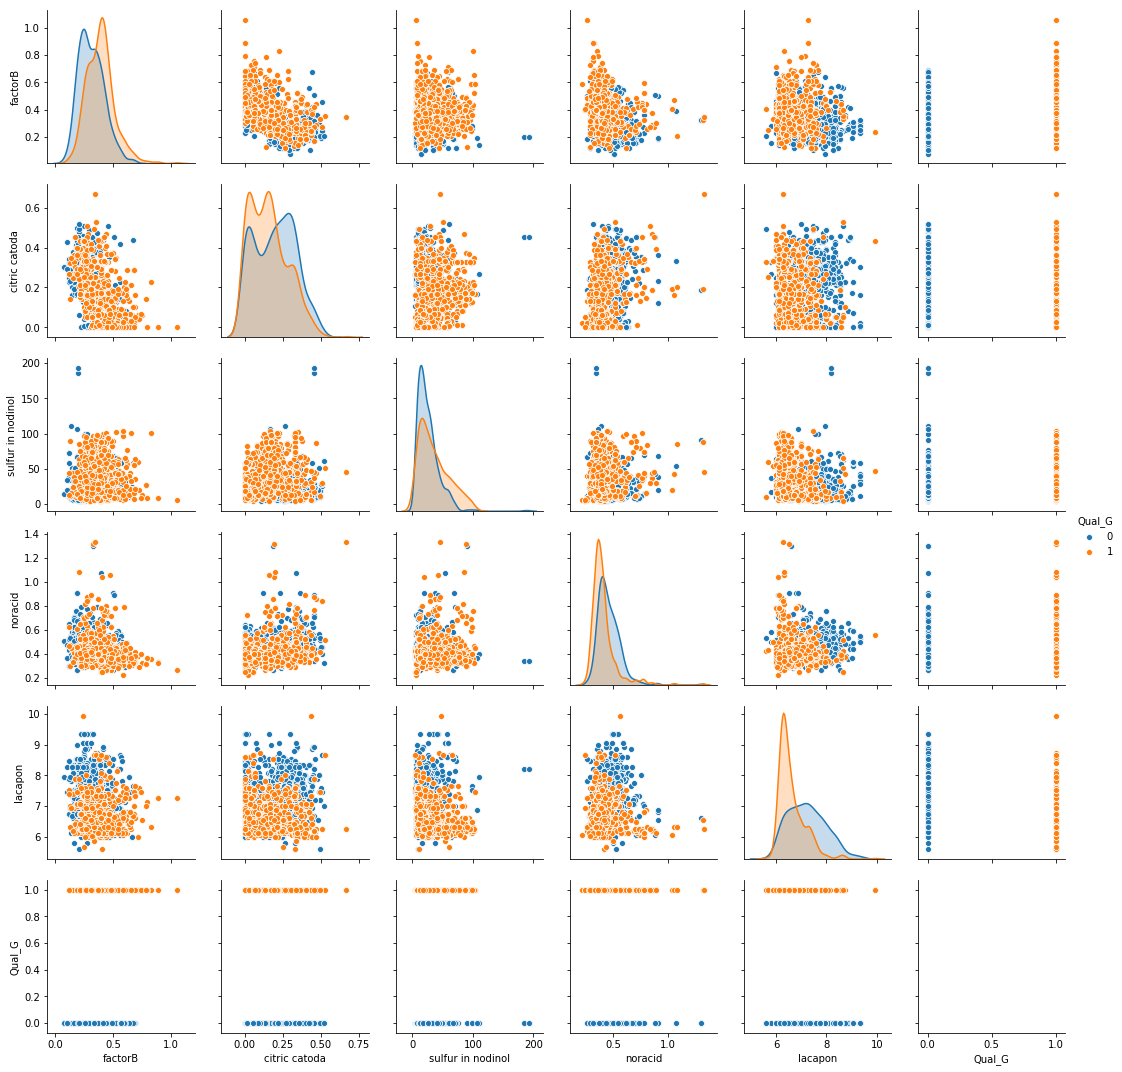

In [39]:
import seaborn as sns
sns.pairplot(data=df[['factorB', 'citric catoda','sulfur in nodinol', 'noracid', 'lacapon','Qual_G']], hue='Qual_G', dropna=True)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


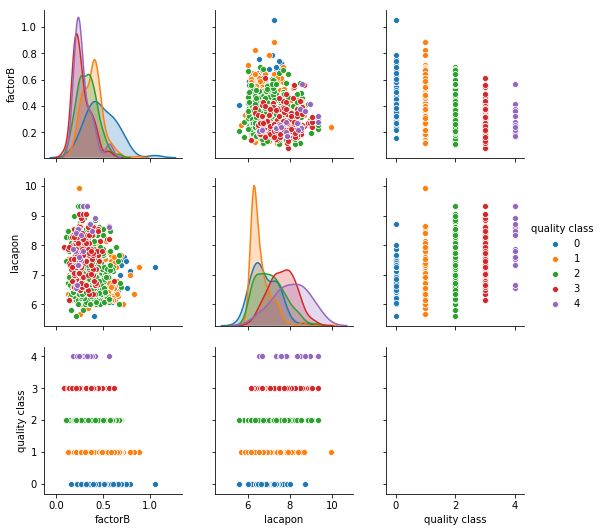

In [6]:
import seaborn as sns

sns.pairplot(data=df[['factorB', 'lacapon','quality class']], hue='quality class', dropna=True)


Dichotomic division is good to display dependencies. Let's see what happen when we use division for 5 class of quality. We use this classes that was made by laboratory. 

# Random Forest algorithm

We can use two approach. 

First: we wont to know what is exactly class of quality has Poliaxid.

Second: we wont to know Poliaxid has first class of quality or not.

Now we realize first approach: multicategorical predictor.

# Multicategorical prediction (Random Forest)


Existing correlation lead to the conclusion that it is possible effective model of artificial intelligence is applied.
It leads to the two conclusions:

•	Laborious method of classification could be replaced by theoretical model.

•	Persons who monitor production process could be informed by the model about probability of final quality of the substance.
Machine learning procedure allows us make try to build such model.


In [7]:
#X.dtypes

We divide set of data in to the independent variables X and dependent variable y, the result of the process.

In [8]:
df.head()

,nr.,factorA,factorB,citric catoda,residual butanol,caroton,stable nodinol,sulfur in nodinol,density,pH,noracid,lacapon,quality class,Qual_G
0,0,4.933333,0.466667,0.000000,1.266667,0.050667,7.333333,22.666667,0.665200,2.340000,0.373333,6.266667,1,First
1,1,5.200000,0.586667,0.000000,1.733333,0.065333,16.666667,44.666667,0.664533,2.133333,0.453333,6.533333,1,First
2,2,5.200000,0.506667,0.026667,1.533333,0.061333,10.000000,36.000000,0.664667,2.173333,0.433333,6.533333,1,First
3,3,7.466667,0.186667,0.373333,1.266667,0.050000,11.333333,40.000000,0.665333,2.106667,0.386667,6.533333,2,Second
4,4,4.933333,0.466667,0.000000,1.266667,0.050667,7.333333,22.666667,0.665200,2.340000,0.373333,6.266667,1,First


Before we start composite model we ought to check if all variables have numeric format. There are one variable has incorrect format. We will change it.

In [9]:
X = df.drop(['quality class','Qual_G'], axis=1) 
y = df['quality class']   

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123,stratify=y)

1. Now we divide database into the training and test underset.
2. Pipeline merge standardization and estimation. We took as the estimation method of Random Forest.
3. Hyperparameters of the random forest regression are declared.
4. Tune model using cross-validation pipeline.

In [11]:
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor

pipeline = make_pipeline(preprocessing.StandardScaler(),
    RandomForestRegressor(n_estimators=100))


hyperparameters = {'randomforestregressor__max_features': ['auto', 'sqrt', 'log2'],
                   'randomforestregressor__max_depth': [None, 5, 3, 1]}

# 7. Tune model using cross-validation pipeline
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(pipeline, hyperparameters, cv=10)
clf.fit(X_train, y_train)


# 8. Refit on the entire training set
# No additional code needed if clf.refit == True (default is True)

# 9. Sprawdzanie wyników klasyfikacji przy użyciu zestawu testowego
y_pred = clf.predict(X_test)
#y_pred = np.round(y_pred, decimals=0)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 wer

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all conv

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all conv

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all conv

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all conv

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all conv

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all conv

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all conv

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all conv

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all conv

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all conv

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all conv

I, as an apprentice, will lead this model to the end. Without this rounding Confusion Matrix would be impossible to use because y from the test set has discrete form but predicted y would be in format continuous.


Now we check what was the super parameters used.

In [12]:
print("The Best parameter:",clf.best_params_)
print("The Best estimator:",clf.best_estimator_)

The Best parameter: {'randomforestregressor__max_depth': None, 'randomforestregressor__max_features': 'log2'}
The Best estimator: Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestregressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='log2', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False))])


We check how balanced are the result variables.

In [13]:
y.value_counts()

1    679
2    635
3    199
0     63
4     18
Name: quality class, dtype: int64

Here we have array with the result of prediction our model. You can see continuous form of result.

In [14]:
y_pred

array([1.79, 1.78, 1.97, 1.05, 1.33, 1.15, 2.28, 1.01, 1.91, 1.89, 1.86,
       1.62, 2.16, 1.37, 2.49, 1.06, 1.5 , 2.02, 1.18, 2.7 , 1.52, 1.24,
       2.02, 1.57, 2.23, 1.33, 2.27, 1.  , 1.57, 1.16, 1.28, 1.78, 0.95,
       2.83, 1.49, 1.38, 1.08, 1.67, 1.09, 1.07, 2.  , 1.02, 2.39, 1.84,
       2.38, 2.46, 1.11, 2.96, 1.32, 1.05, 2.73, 1.87, 1.12, 2.35, 2.44,
       1.78, 1.11, 1.94, 1.06, 1.33, 1.13, 2.43, 2.01, 1.02, 1.85, 1.9 ,
       1.  , 1.29, 2.38, 0.98, 2.4 , 1.18, 1.99, 1.46, 2.08, 1.45, 1.17,
       1.32, 1.38, 1.58, 1.58, 1.34, 2.64, 2.18, 2.57, 1.64, 1.73, 1.57,
       1.84, 1.72, 1.63, 2.58, 2.12, 1.74, 2.12, 0.99, 2.85, 1.38, 1.04,
       1.6 , 1.18, 1.06, 1.01, 0.94, 1.71, 1.07, 2.2 , 2.22, 2.12, 1.45,
       1.78, 2.21, 1.27, 2.17, 1.66, 1.07, 0.96, 1.  , 1.24, 1.59, 1.26,
       1.88, 1.38, 1.37, 1.12, 2.05, 1.5 , 1.5 , 1.89, 1.78, 1.08, 1.43,
       0.83, 1.01, 1.16, 1.43, 1.52, 1.31, 1.13, 1.01, 0.93, 1.03, 1.44,
       1.11, 1.99, 1.92, 1.05, 2.48, 1.16, 1.91, 1.

We make rounding continuous data to the discrete form.

In [15]:
y_pred = np.round(y_pred, decimals=0)
y_pred.astype(int)
y_pred

array([2., 2., 2., 1., 1., 1., 2., 1., 2., 2., 2., 2., 2., 1., 2., 1., 2.,
       2., 1., 3., 2., 1., 2., 2., 2., 1., 2., 1., 2., 1., 1., 2., 1., 3.,
       1., 1., 1., 2., 1., 1., 2., 1., 2., 2., 2., 2., 1., 3., 1., 1., 3.,
       2., 1., 2., 2., 2., 1., 2., 1., 1., 1., 2., 2., 1., 2., 2., 1., 1.,
       2., 1., 2., 1., 2., 1., 2., 1., 1., 1., 1., 2., 2., 1., 3., 2., 3.,
       2., 2., 2., 2., 2., 2., 3., 2., 2., 2., 1., 3., 1., 1., 2., 1., 1.,
       1., 1., 2., 1., 2., 2., 2., 1., 2., 2., 1., 2., 2., 1., 1., 1., 1.,
       2., 1., 2., 1., 1., 1., 2., 2., 2., 2., 2., 1., 1., 1., 1., 1., 1.,
       2., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 2., 1., 2., 1., 1., 2.,
       2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1.,
       1., 1., 2., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1.,
       2., 3., 2., 2., 2., 1., 2., 1., 2., 1., 2., 1., 1., 2., 2., 3., 1.,
       1., 1., 1., 2., 2., 2., 2., 1., 2., 2., 1., 2., 1., 2., 2., 2., 1.,
       2., 2., 2., 2., 1.

Now we make evaluation of the model. We use confusion matrix.

In [16]:
## confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

co_matrix = metrics.confusion_matrix(y_test, y_pred)
co_matrix

array([[  0,   9,   4,   0,   0],
       [  0, 109,  27,   0,   0],
       [  0,  26,  99,   2,   0],
       [  0,   3,  25,  12,   0],
       [  0,   0,   2,   1,   0]], dtype=int64)

In [17]:
# classification_report
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.74      0.80      0.77       136
           2       0.63      0.78      0.70       127
           3       0.80      0.30      0.44        40
           4       0.00      0.00      0.00         3

   micro avg       0.69      0.69      0.69       319
   macro avg       0.43      0.38      0.38       319
weighted avg       0.67      0.69      0.66       319



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [18]:
print("Accuracy: ",np.round(metrics.accuracy_score(y_test, y_pred), decimals=2))
### Target is multiclass but average='binary'
#print("Precision:",np.round(metrics.precision_score(y_test, y_pred), decimals=2))
#print("Recall:   ",np.round(metrics.recall_score(y_test, y_pred), decimals=2))

Accuracy:  0.69


Random Forest with a temporary adaptation to discrete results seems to be good!
According to the f1-score ratio, model of artificial intelligence can good classify for these classes which have many occurrences.
For example 0 class has 13 occurrence and model can't judge this class. In opposite to the class 0 is class 1. There are 136 test values and model can properly judge classes in 82% of cases one from the all 136 aperances.
In next part of this investigation we will test models of artificial intelligence intended to the make classification.


# Categorical prediction (Random Forest)

For example 0 class has only 13 occurrence and model can't forecast this class properly. Class 1 has more numerals. There are 136 test values and model can properly judge classes in 82% of from the all 136 penances ('recall' gauge).
In next part of this investigation we will test models of random forest regression (produce results in continuous form) converted to the categorical classification (results are converted from continuous to discrete form). Such conversion this is not entirely correct. 
Random forest is the popular method using regression engine to obtain discrete result.
Many scientists think that this is incorrect. Andrew Ng, in Machine Learning course at Coursers, explains why this is a bad idea - see his Lecture 6.1 - Logistic Regression | Classification at YouTubee. https://www.youtube.com/watch?v=-la3q9d7AKQ&t=0s&list=PLLssT5z_DsK-h9vYZkQkYNWcItqhlRJLN&index=33

In next part we will use logistic regression that is entirely correct in such situation.

In place of 'quality class' we use result variable: Qual_G. It has string format, with the two values: 'First' and 'Second'. We should convert this values in to the discrete numeric form.

In logistic regression and other kind of models is assumed that 1 is the primary parameter. In our investigation such parameter is first class of Poliaxid. So we assume: "quality class" worse than 1 as the class 0 (that's mean another class than 1) and "quality class" equal 1 as 1.

We change designation in column Qual_G.

In [19]:
df.dtypes

nr.                    int64
factorA              float64
factorB              float64
citric catoda        float64
residual butanol     float64
caroton              float64
stable nodinol       float64
sulfur in nodinol    float64
density              float64
pH                   float64
noracid              float64
lacapon              float64
quality class          int64
Qual_G                object
dtype: object

In [20]:
df.Qual_G = df.Qual_G.str.replace('First','1')
df.Qual_G = df.Qual_G.str.replace('Second','0')

In [21]:
df.Qual_G = df.Qual_G.astype(int)
df.Qual_G.dtypes

dtype('int32')

In discrete categorical regression important is to result sets was balanced. I mean number of state 1 and state 0 should be similar. When exist significant disproportion in result set, model can be predicting defectively.

In [22]:
df.Qual_G.value_counts()

0    852
1    742
Name: Qual_G, dtype: int64

In this cause dependent variable set seems to be balanced.

In [23]:
X = df.drop(['quality class','Qual_G'], axis=1) 
y = df['Qual_G']   

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123,stratify=y)

1. Now we divide database into the training and test underset.
2. Pipeline merge standardization and estimation. We took as the estimation method of Random Forest.
3. Hyperparameters of the random forest regression are declared.
4. Tune model using cross-validation pipeline.

In [25]:
pipeline = make_pipeline(preprocessing.StandardScaler(),
    RandomForestRegressor(n_estimators=100))

hyperparameters = {'randomforestregressor__max_features': ['auto', 'sqrt', 'log2'],
                   'randomforestregressor__max_depth': [None, 5, 3, 1]}

# 7. Tune model using cross-validation pipeline
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(pipeline, hyperparameters, cv=10)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 wer

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all conv

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all conv

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all conv

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all conv

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all conv

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all conv

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all conv

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all conv

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all conv

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 wer

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all conv

In [26]:
y_pred

array([0.89, 0.59, 0.17, 0.22, 0.91, 0.35, 0.08, 0.18, 0.45, 0.63, 0.6 ,
       0.9 , 0.93, 0.91, 0.39, 0.84, 0.95, 0.89, 0.69, 0.08, 0.65, 0.02,
       0.53, 0.86, 0.77, 0.88, 0.75, 0.74, 0.32, 0.11, 0.77, 0.16, 0.8 ,
       0.88, 0.46, 0.86, 0.14, 0.49, 0.32, 0.14, 0.99, 0.59, 0.37, 0.37,
       0.49, 0.78, 0.77, 0.18, 0.31, 0.85, 0.52, 0.2 , 0.92, 0.19, 0.14,
       0.38, 0.49, 0.84, 0.14, 0.01, 0.47, 0.11, 0.07, 0.14, 0.26, 0.17,
       0.15, 0.51, 0.9 , 0.06, 0.85, 0.18, 0.7 , 0.74, 0.43, 0.43, 0.64,
       0.94, 0.22, 0.6 , 0.9 , 0.83, 0.73, 0.88, 0.27, 0.58, 0.64, 0.9 ,
       0.73, 0.08, 0.18, 0.28, 0.66, 0.93, 0.82, 0.31, 0.82, 0.35, 0.09,
       0.92, 0.14, 0.86, 0.92, 0.08, 0.68, 0.07, 0.28, 0.07, 0.75, 0.73,
       0.84, 0.77, 0.78, 0.47, 0.51, 0.6 , 0.89, 0.64, 0.28, 0.43, 0.69,
       0.24, 0.7 , 0.78, 0.84, 0.68, 0.81, 0.19, 0.03, 0.67, 0.05, 0.82,
       0.52, 0.2 , 0.92, 0.93, 0.3 , 0.19, 0.16, 0.56, 0.68, 0.67, 0.11,
       0.28, 0.7 , 0.4 , 0.91, 0.51, 0.4 , 0.6 , 0.

We make rounding continuous data to the discrete form.

In [27]:
y_pred = np.round(y_pred, decimals=0)
y_pred.astype(int)
y_pred

array([1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1.,
       0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1.,
       1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0.,
       1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 0., 0., 0.

In [28]:
## confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

co_matrix = metrics.confusion_matrix(y_test, y_pred)
co_matrix

array([[135,  36],
       [ 26, 122]], dtype=int64)

In [29]:
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.84      0.79      0.81       171
           1       0.77      0.82      0.80       148

   micro avg       0.81      0.81      0.81       319
   macro avg       0.81      0.81      0.81       319
weighted avg       0.81      0.81      0.81       319



In [30]:
print("Accuracy: ",np.round(metrics.accuracy_score(y_test, y_pred), decimals=2))
print("Precision:",np.round(metrics.precision_score(y_test, y_pred), decimals=2))
print("Recall:   ",np.round(metrics.recall_score(y_test, y_pred), decimals=2))

Accuracy:  0.81
Precision: 0.77
Recall:    0.82


# Logistic regression

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
X = df.drop(['quality class','Qual_G'], axis=1) 
y = df['Qual_G']  

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = .33, stratify = y, random_state = 148)

We are configure settings for grid. 

In [33]:
Parameteres = {'C': np.power(10.0, np.arange(-3, 3))}
LR = LogisticRegression(warm_start = True)
LR_Grid = GridSearchCV(LR, param_grid = Parameteres, scoring = 'roc_auc', n_jobs = 5, cv=2)

Explanation for the code:
# Parameteres
Parameteres = {'C': np.power(10.0, np.arange(-3, 3))} array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]) We have tipical setting for the grid.
# warm_start
Using 'warm_start=True' causes utilization of last model setting to next run of the model. Thank to this model speeds up time of finding convergence. Parameter warm_start is useful in making multiple convergences with the same model using various settings.
# scoring = 'roc_auc'
The ROC plot estimates the best of setting of classification. Finding the area under the ROC curve is the most popular method of evaluation of classification efficiency by the grid.
# jobs = 5
Number of tasks running simultaneously
# cv = 2
Number of cross verifications. Model takes the form of the equation:

In [34]:
LR_Grid.fit(Xtrain, ytrain) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=True),
       fit_params=None, iid='warn', n_jobs=5,
       param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [35]:
ypred = LR_Grid.predict(Xtest)

In [36]:
## confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

co_matrix = metrics.confusion_matrix(ytest, ypred)
co_matrix

array([[196,  86],
       [ 76, 169]], dtype=int64)

In [37]:
print(classification_report(ytest, ypred)) 

              precision    recall  f1-score   support

           0       0.72      0.70      0.71       282
           1       0.66      0.69      0.68       245

   micro avg       0.69      0.69      0.69       527
   macro avg       0.69      0.69      0.69       527
weighted avg       0.69      0.69      0.69       527



In [38]:
print("Accuracy: ",np.round(metrics.accuracy_score(y_test, y_pred), decimals=2))
print("Precision:",np.round(metrics.precision_score(y_test, y_pred), decimals=2))
print("Recall:   ",np.round(metrics.recall_score(y_test, y_pred), decimals=2))

Accuracy:  0.81
Precision: 0.77
Recall:    0.82
